### Lab Assignment 3

**Implement gradient descent for a single feature linear regression problem and find the 
optimal parameters (w, b).**

---------


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

We will need these functions to implement gradient descent
1. cost function compute (already done in lab2)
2. compute gradients for J(w, b) wrt w and b
3. compute gradient descent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:

def compute_cost(x, y, w, b):
    """
    Compute the cost function
    
    Args:
        x (ndarray) : 1 D vector of feature
        y (ndarray) : 1 D vector of labels
        w,b (scalar) : parameters of model
        
    Returns:
       cost (float) : compute mean squared error of the model and returns a scalar number 
    """

    # We are not using for loop method
    # we use numpy operations on ndarray for faster computing

    y_predicted = w * x + b

    m = len(x)  # len of dataset

    # compute cost
    error = y_predicted - y
    squared_error = error ** 2
    cost = np.sum(squared_error) / (2 * m)
    return cost

In [4]:
def compute_gradients(x, y, w, b):
    y_predicted = w * x + b
    
    m = len(x)
    
    # compute gradients
    
    error = y_predicted - y
    
    dj_dw = 1/m * (np.sum(error * x))
    dj_db = 1/m * (np.sum(error))
    
    return dj_dw, dj_db

In [8]:
def gradient_descent(x, y, w, b, alpha, epoch):
    
    # -- iterate till convergence
    # 1 - make the prediction with w and b
    # 2 - compute the cost
    # 3 - calculate new w and b with gradient descent 
        # - compute_gradients and multiply with learning rate...
        
    # alpha, epoch are hyperparameters which are decided by us
    
    w_new = w
    b_new = b
    
    J_history = []
    p_history = []
    
    for i in range(epoch):
        dj_dw, dj_db = compute_gradients(x, y, w_new, b_new)
        
        # gradient descent
        w_new = w_new - alpha * dj_dw
        b_new = b_new - alpha * dj_db
        
        if i < 100000:
            cost = compute_cost(x, y, w_new, b_new)
            J_history.append(cost)
            p_history.append([w_new, b_new])
            
    return w_new, b_new, J_history, p_history

In [9]:
df = pd.read_csv("areas.csv")
x_train = df["area"]
y_train = df["prices"]

In [ ]:
w = 0
b = 0

epoch = 10000

alpha = 0.01 # can change alpha to see how it impacts the descent

x_train = np.array([1.0, 2.0])  # features
y_train = np.array([300.0, 500.0])  # target value

w, b, J_history, p_history =  gradient_descent(x_train, y_train, w, b, alpha, epoch)

print(f"Computed w : {w} and b : {b}")

Computed w : -48453.651333120026 and b : -29956.671528960018


### Plot the cost function with epoch
This graph is useful in checking if our loss function is converging with increasing iterations

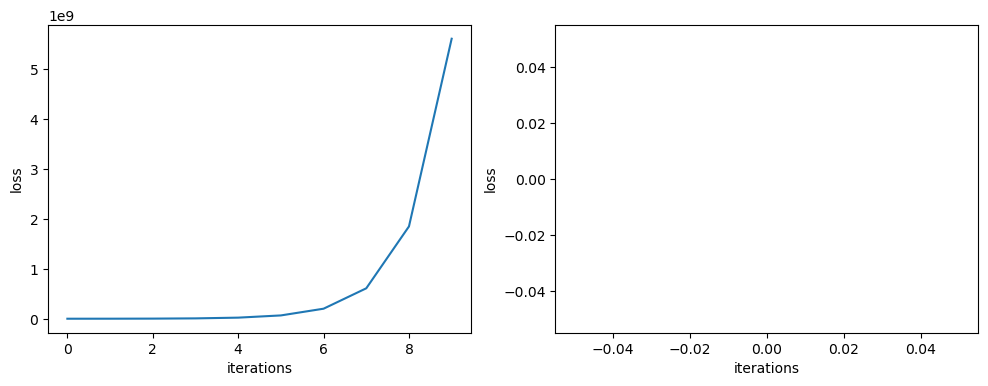

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history)

ax1.set_xlabel("iterations")
ax2.set_xlabel("iterations")
ax1.set_ylabel("loss")
ax2.set_ylabel("loss")

plt.show()